## TASK 3
### Pizza Place Sales##### 
A yea';s worth of sales from a fictitious pizza place, including the date and time of each orde 
and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.

Loaded files shapes:
 orders: (21350, 3)
 order_details: (48620, 4)
 pizzas: (96, 4)
 pizza_types: (32, 4)

First 3 columns of each files:

   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28 

   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1 

    pizza_id pizza_type_id size  price
0  bbq_ckn_s       bbq_ckn    S  12.75
1  bbq_ckn_m       bbq_ckn    M  16.75
2  bbq_ckn_l       bbq_ckn    L  20.75 

  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  

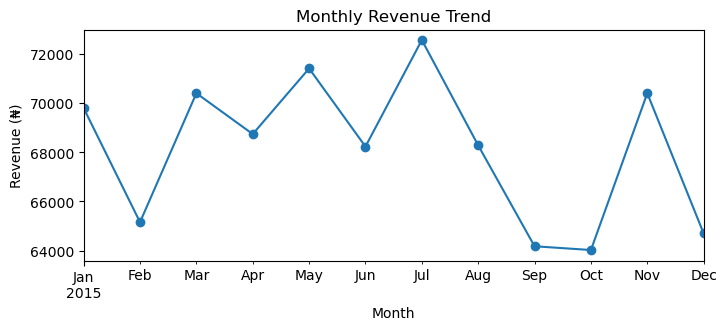

   Trend observation: monthly revenue is relatively stable across the year (no large sustained upward or downward trend),
   with some small peaks (e.g., May/July/November) and troughs (e.g., Feb/Sept/Oct).

10) Bottom pizza types by revenue (example bottom 5):
                           total_revenue  total_quantity
name                                                    
The Brie Carre Pizza            11588.50             490
The Green Garden Pizza          13955.75             997
The Spinach Supreme Pizza       15277.75             950
The Mediterranean Pizza         15360.50             934
The Spinach Pesto Pizza         15596.00             970

Pizzas on menu but never sold (count = 5). Examples (pizza_id, size, price, pizza_type_id):
     pizza_id size  price pizza_type_id
   big_meat_m    M  16.00      big_meat
   big_meat_l    L  20.50      big_meat
five_cheese_s    S  12.50   five_cheese
five_cheese_m    M  15.50   five_cheese
four_cheese_s    S  11.75   four_cheese



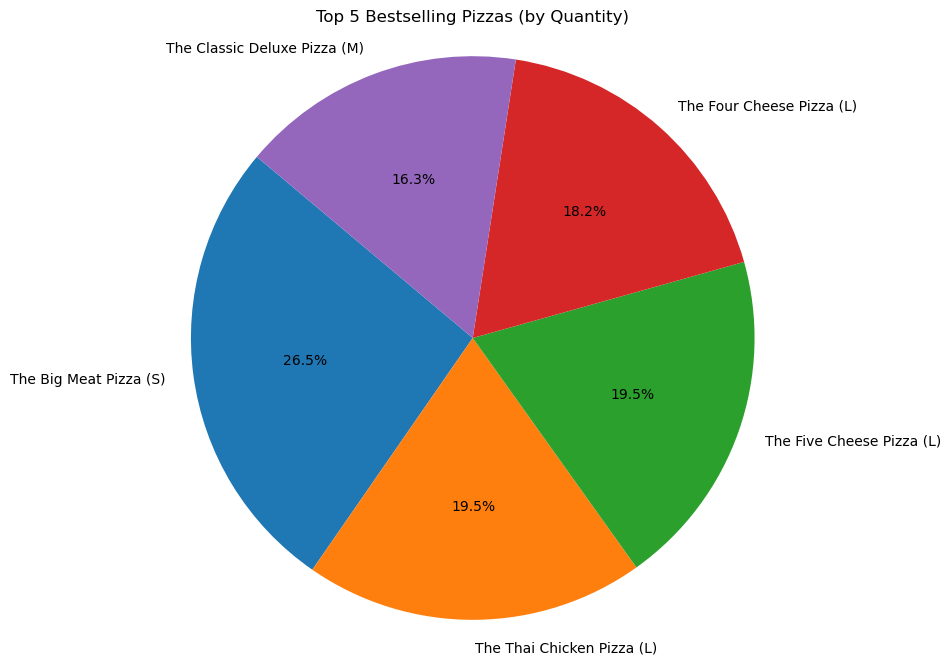

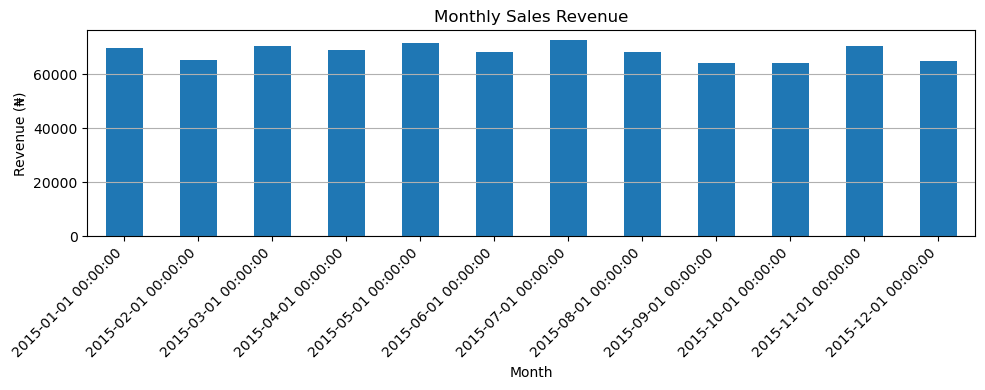

In [3]:
# Importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Loading data

orders = pd.read_csv(r"C:\Users\USER\Desktop\TECHCRUSH\orders.csv")
order_details = pd.read_csv(r"C:\Users\USER\Desktop\TECHCRUSH\order_details.csv")
pizzas = pd.read_csv(r"C:\Users\USER\Desktop\TECHCRUSH\pizzas.csv")
pizza_types = pd.read_csv(r"C:\Users\USER\Desktop\TECHCRUSH\pizza_types.csv", encoding='latin-1')

# Loading the files shapes
print("Loaded files shapes:")
print(" orders:", orders.shape)
print(" order_details:", order_details.shape)
print(" pizzas:", pizzas.shape)
print(f" pizza_types: {pizza_types.shape}")
print()

# Printing of first 3 columns of each files - this will display how innitail 
# tables looks like before merging

print("First 3 columns of each files:\n" )
print(orders.head(3), "\n")
print(order_details.head(3), "\n")
print(pizzas.head(3), "\n")
print(pizza_types.head(3), "\n")
print()

# Merging datasets into one table

# Merging order_details with pizzas (attach size and price)
merged = order_details.merge(pizzas, on="pizza_id", how="left")

# Merging pizza_types to get pizza name and ingredients
merged = merged.merge(pizza_types, on="pizza_type_id", how="left")

# Merging orders to attach date & time for each order line
merged = merged.merge(orders, on="order_id", how="left")

# Create a full pizza name + size for readable labels (Example: "The Classic Deluxe Pizza (M)"),
# and concatenates the pizza name and size together into a single string.
merged["pizza_full_name"] = merged["name"].astype(str) + " (" + merged["size"].astype(str) + ")"


# Cleaning and preparing columns

# Parse combined date + time into a datetime column
# Some rows may already be in proper strings; this converts them to pandas datetime
merged["datetime"] = pd.to_datetime(merged["date"].astype(str) + " " + merged["time"].astype(str), errors="coerce")

# Extract hour, weekday name, and month period for totaling
merged["hour"] = merged["datetime"].dt.hour
merged["weekday"] = merged["datetime"].dt.day_name()
merged["month"] = merged["datetime"].dt.to_period("M")   # period like 2015-01

# converting to numeric, ensure error free, fill na as 0, and convert to int.
merged["price"] = pd.to_numeric(merged["price"], errors="coerce")
merged["quantity"] = pd.to_numeric(merged["quantity"], errors="coerce").fillna(0).astype(int)

# Computing line-level revenue = price * qty
merged["line_revenue"] = merged["price"] * merged["quantity"] # multiplying price by quantity

# Quick data sanity check counts
missing_price_count = merged["price"].isna().sum()
missing_datetime_count = merged["datetime"].isna().sum()
print(f"Missing price values in merged lines: {missing_price_count}")
print(f"Missing datetime values in merged lines: {missing_datetime_count}")
print()

# Q1. Total revenue/sales

total_revenue = merged["line_revenue"].sum()
print(f"1) Total revenue/sales: ₦{total_revenue:,}")

# Q2. Total quantity sold

total_quantity = merged["quantity"].sum()
print(f"2) Total quantity sold (total pizzas): {int(total_quantity):,d}")

# Q3. Total orders

total_orders = orders["order_id"].nunique() # count the number of unique codes without duplication
print(f"3) Total distinct orders: {int(total_orders):,d}")

# Q4. Number of pizza types sold

num_pizza_types = pizza_types["pizza_type_id"].nunique() # count the number of unique codes without duplication
print(f"4) Number of pizza types sold: {int(num_pizza_types):d}")

# Q5. Average price of pizzas (menu average)
# computing the average of the pizzas table (menu price)
avg_menu_price = pd.to_numeric(pizzas["price"], errors="coerce").mean()
print(f"5i) Average pizza price (menu): ₦{avg_menu_price:.2f}")

# Computing sales-weighted average price
sales_weighted_avg_price = (merged["line_revenue"].sum() / merged["quantity"].sum()) if merged["quantity"].sum() > 0 else np.nan
print(f"5ii) Sales-weighted average pizza price: ₦{sales_weighted_avg_price:.2f}")
print()

# Q6. Peak hours of sales

# Aggregate revenue and unique orders by hour
revenue_by_hour = merged.groupby("hour")["line_revenue"].sum()
orders_by_hour = merged.groupby("hour")["order_id"].nunique()

# Sorting to find top hours
top_hours_by_revenue = revenue_by_hour.sort_values(ascending=False).head(5) # sorting in ascending order and show 5 columns
top_hours_by_orders = orders_by_hour.sort_values(ascending=False).head(5) # sorting in ascending order and show 5 columns

print("6i) Peak hours by revenue (top 5):")
print(top_hours_by_revenue)
print()
print("6ii) Peak hours by number of unique orders (top 5):")
print(top_hours_by_orders)
print()

# Q7. Sales by day of week & best day

sales_by_weekday = merged.groupby("weekday")["line_revenue"].sum() # groups all rows of data by the weekday column and sum up
                                                                    # sum up the line_revenue values.
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

sales_by_weekday = sales_by_weekday.reindex(weekday_order).fillna(0) # rearranges the Series so the rows follow Monday to Sunday, and fill 
                                                                        # any missing number with 0
best_weekday = sales_by_weekday.idxmax()
print("7) Sales by weekday (revenue):")
for wd, val in sales_by_weekday.items(): # using for loop to fatch out items
    print(f"   {wd}: ₦{val:,.2f}")
print(f"   Day with most sales (by revenue): {best_weekday}")
print()


# Q8. Top 5 bestselling pizzas (by quantity)

quantity_by_pizza = merged.groupby("pizza_full_name")["quantity"].sum()
top5_pizzas = quantity_by_pizza.sort_values(ascending=False).head(5)
print("8) Top 5 bestselling pizzas (by quantity):")
print(top5_pizzas)
print()


# Q9. Sales made in each month (and trend observation)

sales_by_month = merged.groupby("month")["line_revenue"].sum().sort_index()
print("9) Sales by month (YYYY-MM : revenue):")
for period, val in sales_by_month.items():
    print(f"   {period.strftime('%Y-%m')}: ₦{val:,.2f}")
print()

sales_by_month = merged.groupby("month")["line_revenue"].sum().sort_index()
print("\n9) Sales by month:")
print(sales_by_month)

# Plot monthly trend
sales_by_month.index = sales_by_month.index.to_timestamp() # turning months and date to real calendar dates 
sales_by_month.plot(marker="o", figsize=(8,3), title="Monthly Revenue Trend")
plt.ylabel("Revenue (₦)")
plt.xlabel("Month")
plt.show()

# Simple trend observation:
print("   Trend observation: monthly revenue is relatively stable across the year (no large sustained upward or downward trend),")
print("   with some small peaks (e.g., May/July/November) and troughs (e.g., Feb/Sept/Oct).")
print()

# Q10. Pizza types not doing well on the menu

ptype_perf = merged.groupby("name").agg(
    total_revenue=("line_revenue","sum"),
    total_quantity=("quantity","sum")
).sort_values("total_revenue", ascending=True) # Sort by values in ascending order

print("10) Bottom pizza types by revenue (example bottom 5):")
print(ptype_perf.head(5).to_string())
print()

# Also reporting pizza size-specific that were never sold
sold_pizza_ids = merged["pizza_id"].unique()
unsold_pizza_size_spec = pizzas.loc[~pizzas["pizza_id"].isin(sold_pizza_ids)].merge(pizza_types, on="pizza_type_id", how="left")
print(f"Pizzas on menu but never sold (count = {unsold_pizza_size_spec.shape[0]}). Examples (pizza_id, size, price, pizza_type_id):")
if unsold_pizza_size_spec.shape[0] > 0:
    print(unsold_pizza_size_spec[["pizza_id","size","price","pizza_type_id"]].head(20).to_string(index=False)) # convert to string
else:
    print("None")
print()


# 14) Visualizations: Pie chart for top 5 pizzas and bar chart for monthly sales

# Displaying top 5 for pie chart
top5_for_pie = top5_pizzas.copy() # Makes a copy of top5_for_pie

# Pie chart: slice labels may be long; autopct shows percentage of top 5 relative to themselves (sum of top5)

plt.figure(figsize=(8,8)) # gives the size of canvas
plt.pie(top5_for_pie, labels=top5_for_pie.index, autopct="%1.1f%%", startangle=140) # writes the percentage value inside each slice & rotates the starting angle 140
plt.title("Top 5 Bestselling Pizzas (by Quantity)")
plt.axis("equal")   # keep pie circular
plt.show()

# Bar chart: monthly sales
sales_by_month_plot = sales_by_month.copy() # Makes a sales_by_month_plot

# Convert PeriodIndex to TimestampIndex only if needed
if isinstance(sales_by_month_plot.index, pd.PeriodIndex):
    sales_by_month_plot.index = sales_by_month_plot.index.to_timestamp()

plt.figure(figsize=(10,4))
sales_by_month_plot.plot(kind="bar") # plot this Series as a bar chart
plt.title("Monthly Sales Revenue") # Adds a title above the chart
plt.xlabel("Month") # Label the X-axis as "Month"
plt.ylabel("Revenue (₦)") # Label the Y-axis as "Revenue"
plt.xticks(rotation=45, ha="right") # Rotates the month labels on the X-axis 45 degrees & aligns them to the right
plt.grid(axis="y") # Adds horizontal grid lines across the Y-axis only.
plt.tight_layout() # Adjusts spacing so nothing (like labels) gets cut off at the edges.
plt.show() # Display the chart
